<a href="https://colab.research.google.com/github/manvendra7/demo-repo/blob/main/Income_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Census Adult Income Analysis

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Questions for analysis

* Education of females and their income
* How many people are not from United-states
* Comparison of age and work class and income
* Education and income.
* number of employeed black people in us with income more than 50k
* How many people are unmarried
* ratio of black and white peoples with their incomes
* Number of males and females
* Working hour of people having salary greater 50K
* Occupation of the people who have income >50


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis Project/adult.csv',na_values='?')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.shape #shape of the data

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df.isnull().sum() != 0

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

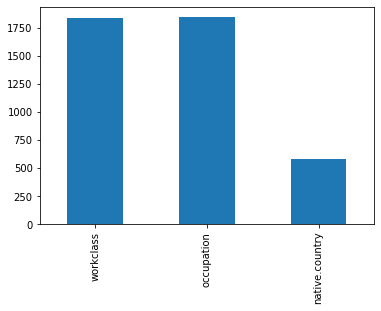

In [12]:
df.isnull().sum()[df.isnull().sum() != 0].plot(kind='bar')

## Univariate Analysis

In [13]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [17]:
df.workclass.unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

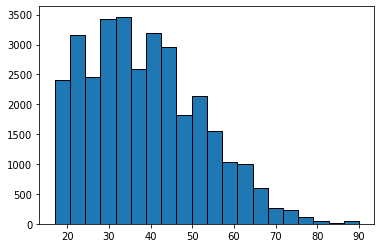

In [21]:
plt.hist(df.age,bins=20,edgecolor='k')
plt.show()

In [25]:
cat_col = df.select_dtypes(include='object')
cat_col

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [26]:
cat_col.apply(lambda x : x.unique())

workclass         [nan, Private, State-gov, Federal-gov, Self-em...
education         [HS-grad, Some-college, 7th-8th, 10th, Doctora...
marital.status    [Widowed, Divorced, Separated, Never-married, ...
occupation        [nan, Exec-managerial, Machine-op-inspct, Prof...
relationship      [Not-in-family, Unmarried, Own-child, Other-re...
race              [White, Black, Asian-Pac-Islander, Other, Amer...
sex                                                  [Female, Male]
native.country    [United-States, nan, Mexico, Greece, Vietnam, ...
income                                                [<=50K, >50K]
dtype: object

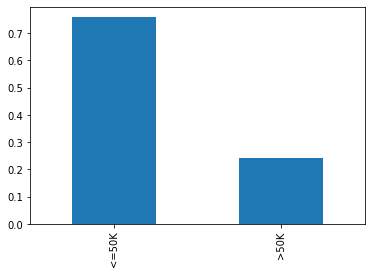

In [34]:
(df.income.value_counts()/df.shape[0]).plot(kind='bar')

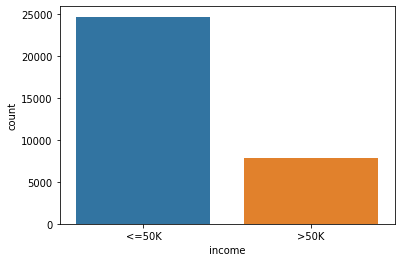

In [30]:
sns.countplot(x='income',data=df)
plt.show()

Out of 36000 we have almost 25000of them are earning less than or equals to 50k. Only 7841.

In [35]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

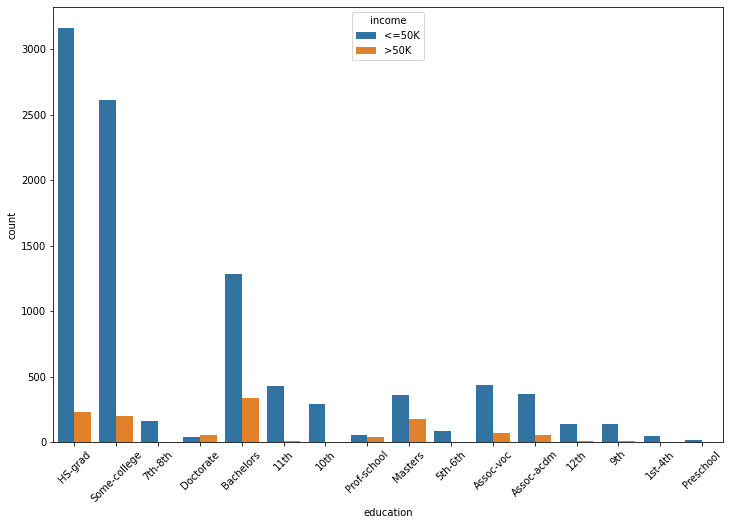

In [49]:
fem_df = df[df.sex == 'Female']
plt.figure(figsize=(12,8))
sns.countplot(x='education',data=fem_df,hue='income')
plt.xticks(rotation=45)
plt.show()

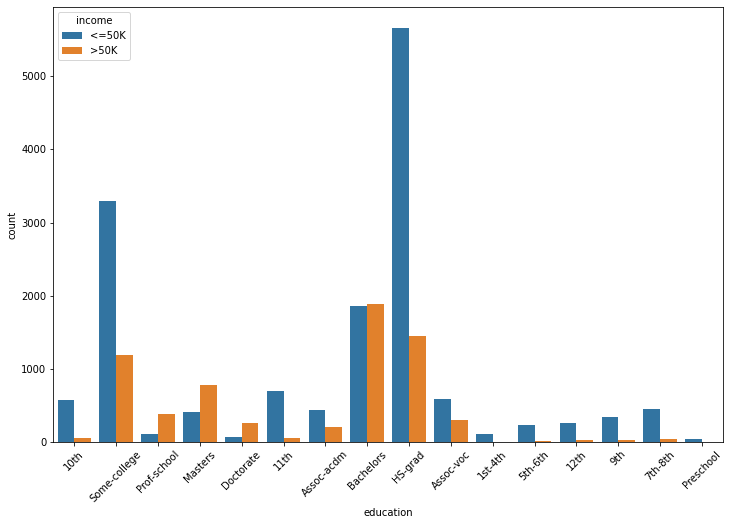

In [50]:
m_df = df[df.sex == 'Male']
plt.figure(figsize=(12,8))
sns.countplot(x='education',data=m_df,hue='income')
plt.xticks(rotation=45)
plt.show()

In [58]:
non_us = df[df['native.country'] != 'United-States']

In [59]:
non_us

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
26,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,<=50K
27,49,Private,122066,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,2603,40,Greece,<=50K
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K
32528,81,NaN,120478,Assoc-voc,11,Divorced,NaN,Unmarried,White,Female,0,0,1,NaN,<=50K
32536,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32549,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


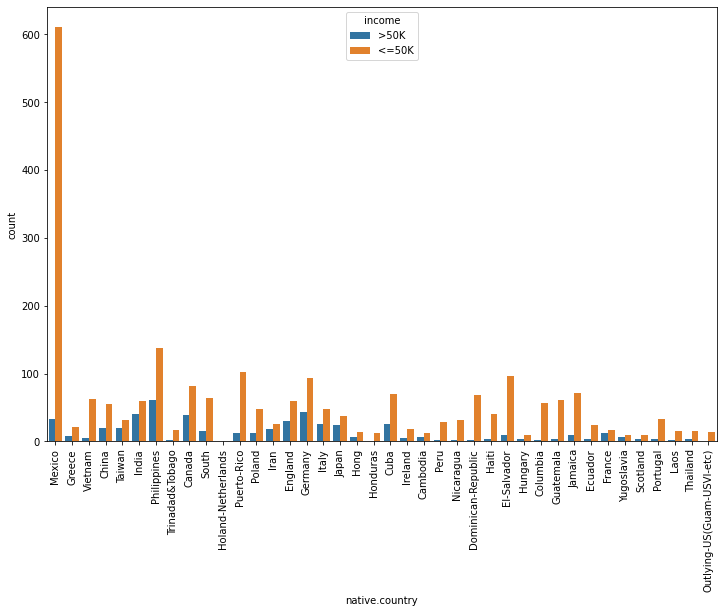

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x='native.country',data=non_us,hue='income')
plt.xticks(rotation=90)
plt.show()

In [63]:
df[['income','workclass','age']]

,income,workclass,age
0,<=50K,NaN,90
1,<=50K,Private,82
2,<=50K,NaN,66
3,<=50K,Private,54
4,<=50K,Private,41
...,...,...,...
32556,<=50K,Private,22
32557,<=50K,Private,27
32558,>50K,Private,40
32559,<=50K,Private,58


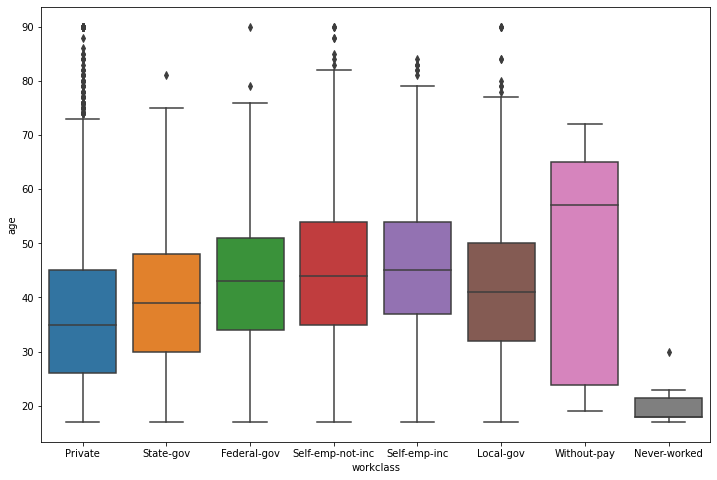

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x='workclass',y='age',data=df)
plt.show()

In [73]:
df[df['workclass'] == 'Without-pay'][['age','education']].describe(include='all')

,age,education
count,14.000000,14
unique,NaN,4
top,NaN,HS-grad
freq,NaN,9
mean,47.785714,NaN
std,21.075610,NaN
min,19.000000,NaN
25%,23.750000,NaN
50%,57.000000,NaN
75%,65.000000,NaN


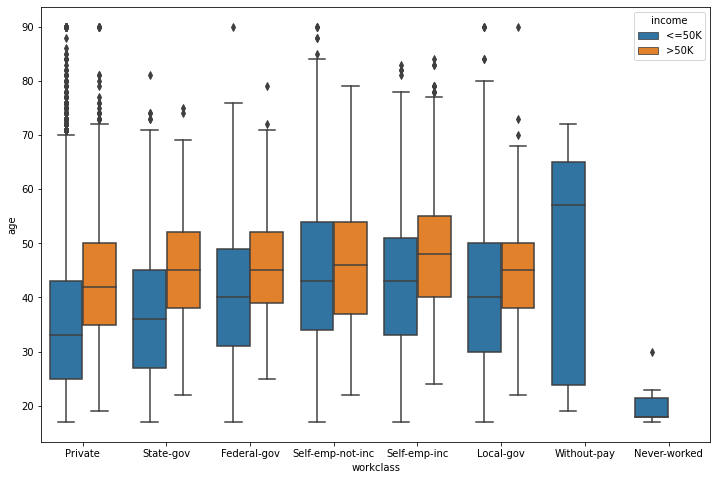

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x='workclass',y='age',data=df,hue='income')
plt.show()

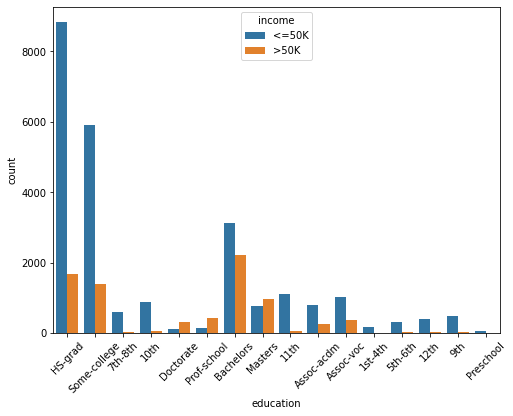

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(x='education',data=df,hue='income')
plt.xticks(rotation=45)
plt.show()

In [79]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [82]:
b_df = df[df.race == 'Black']

In [83]:
b_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
34,60,Self-emp-not-inc,205246,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,2559,50,United-States,>50K
125,27,Private,156516,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,2377,20,United-States,<=50K


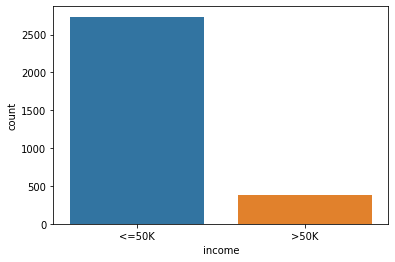

In [84]:
sns.countplot(x='income',data=b_df)

In [85]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

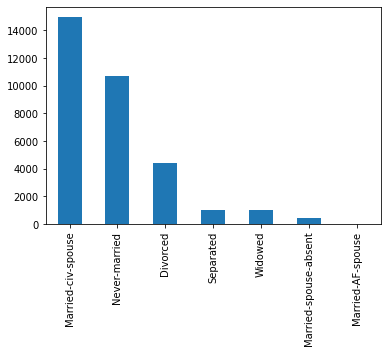

In [88]:
df['marital.status'].value_counts().plot(kind='bar')

In [92]:
len(df[df['race']=='Black'])/len(df)

0.0959429992936335

In [91]:
len(df[df['race']=='White'])/len(df)

0.8542735173981143

In [94]:
df['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

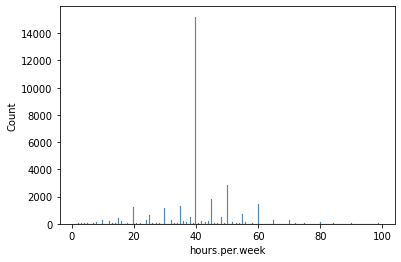

In [98]:
sns.histplot(df['hours.per.week'])

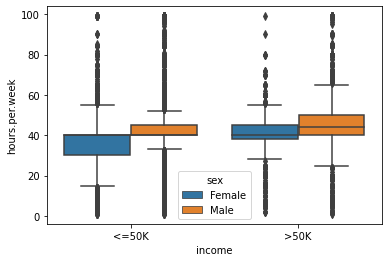

In [100]:
sns.boxplot(x='income', y = 'hours.per.week',data=df,hue='sex')
plt.show()

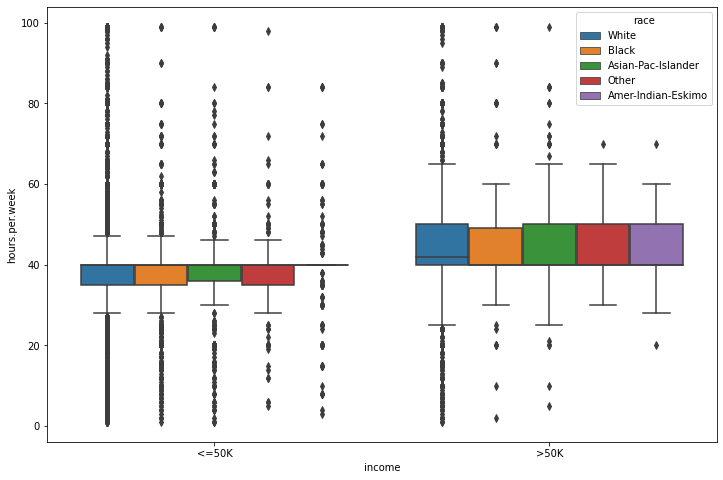

In [106]:
plt.figure(figsize=(12,8))
sns.boxplot(x='income', y = 'hours.per.week',data=df,hue='race')
plt.show()

In [107]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [108]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

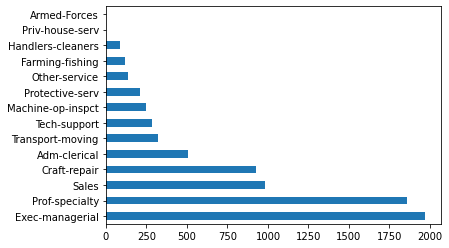

In [111]:
df[df['income'] == '>50K']['occupation'].value_counts().plot(kind='barh')